<a href="https://colab.research.google.com/github/viruszig-cyber/Predicting-Customer-Churn-in-a-Telecommunications-Assignment/blob/main/data_analysis_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

In [75]:
df = pd.read_csv('realtor-data.csv')
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          904966 non-null  object 
 1   bed             775126 non-null  float64
 2   bath            791082 non-null  float64
 3   acre_lot        638324 non-null  float64
 4   city            904894 non-null  object 
 5   state           904966 non-null  object 
 6   zip_code        904762 non-null  float64
 7   house_size      612080 non-null  float64
 8   prev_sold_date  445865 non-null  object 
 9   price           904895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 69.0+ MB


In [77]:
df['price'].describe()

count    9.048950e+05
mean     8.774382e+05
std      2.457698e+06
min      0.000000e+00
25%      2.685000e+05
50%      4.750000e+05
75%      8.300000e+05
max      8.750000e+08
Name: price, dtype: float64

<ipython-input-78-9c382d73f616>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  CorrMap = df.corr()


<Axes: >

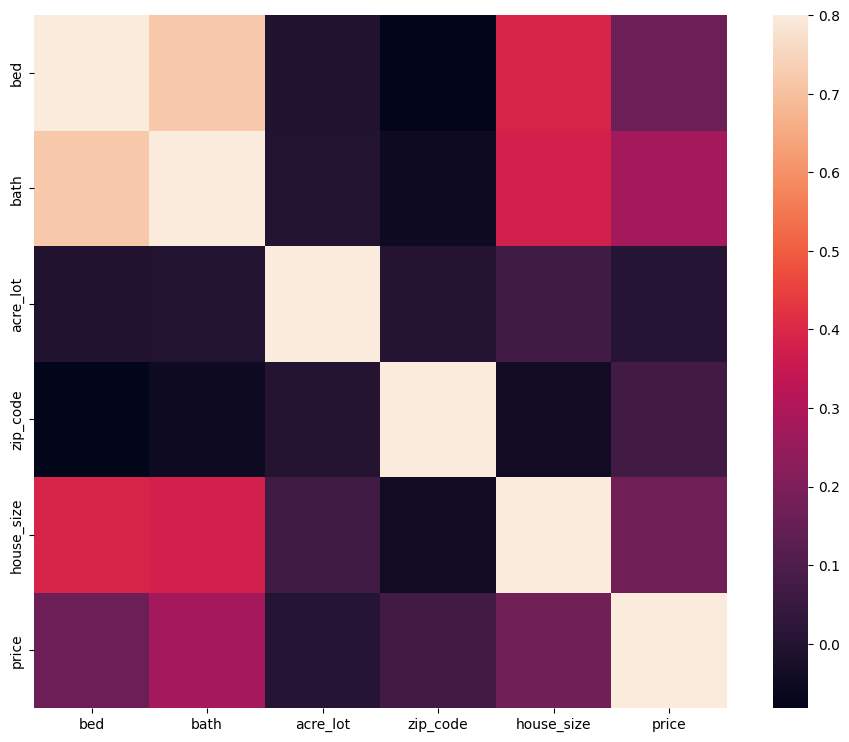

In [78]:
CorrMap = df.corr()
plt.figure(figsize = (12,9))
sns.heatmap(CorrMap,vmax = 0.8 , square = True)

In [79]:
Total = df.isnull().sum().sort_values(ascending = False)
Percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
Missing_data = pd.concat([Total , Percent],axis = 1 ,keys = ['Total' , 'Percentage'])
Missing_data

,Total,Percentage
prev_sold_date,459101,0.507313
house_size,292886,0.323643
acre_lot,266642,0.294643
bed,129840,0.143475
bath,113884,0.125843
zip_code,204,0.000225
city,72,0.000080
price,71,0.000078
status,0,0.000000
state,0,0.000000


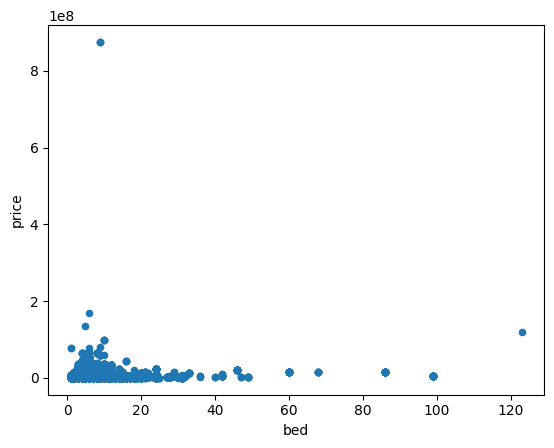

In [80]:
data = pd.concat([df['price'],df['bed']],axis = 1)
data.plot.scatter(x = 'bed',y = 'price')
plt.show()

In [81]:
df['bed'].sort_values(ascending = False)[:1]
df = df.drop(df[df['bed'] == 86].index)

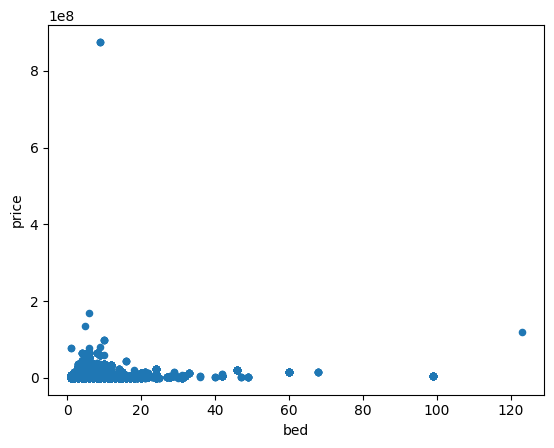

0

In [82]:
data = pd.concat([df['price'],df['bed']],axis = 1)
data.plot.scatter(x = 'bed',y = 'price')
plt.show()
df['bed'].fillna(df['bed'].dropna().median(),inplace = True)
df['bed'].isnull().sum()

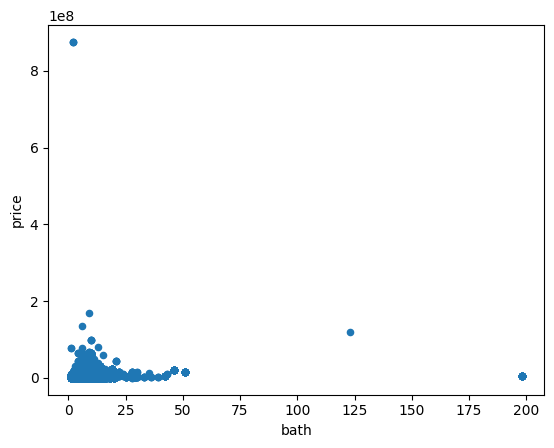

In [83]:
data = pd.concat([df['price'],df['bath']],axis = 1)
data.plot.scatter(x = 'bath' , y = 'price')
plt.show()

In [84]:
df['bath'].sort_values(ascending = False)[:4]
df = df.drop(df[df['bath'] == 36].index)
df = df.drop(df[df['bath'] == 35].index)

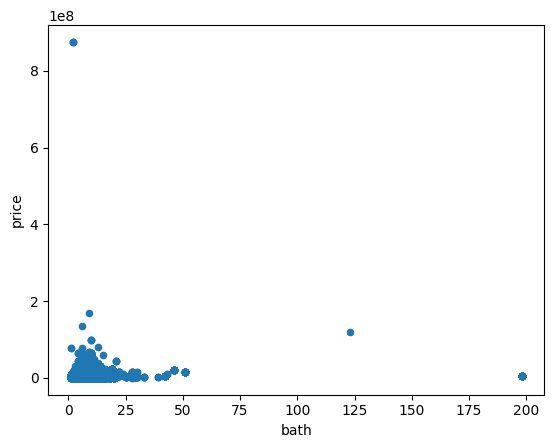

0

In [85]:
data = pd.concat([df['price'],df['bath']],axis = 1)
data.plot.scatter(x = 'bath' , y = 'price')
plt.show()
df['bath'].fillna(df['bath'].dropna().median(),inplace = True)
df['bath'].isnull().sum()

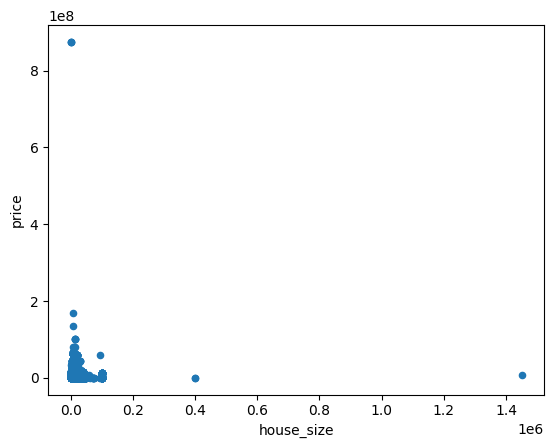

In [86]:
data = pd.concat([df['price'],df['house_size']],axis = 1)
data.plot.scatter(x = 'house_size',y = 'price')
plt.show()

In [87]:
df['house_size'].sort_values(ascending = False)[:1]
df = df.drop(df[df['house_size'] == 1450112].index)

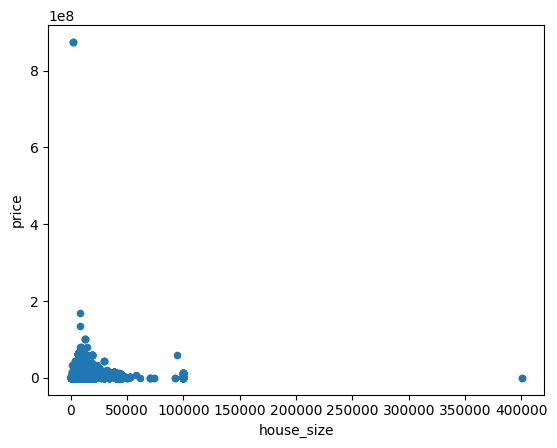

0

In [88]:
data = pd.concat([df['price'],df['house_size']],axis = 1)
data.plot.scatter(x = 'house_size',y = 'price')
plt.show()
df['house_size'].fillna(df['house_size'].dropna().median(),inplace = True)
df['house_size'].isnull().sum()

In [89]:
df['acre_lot'].fillna(df['acre_lot'].dropna().median(),inplace = True)
df['acre_lot'].isnull().sum()

0

In [90]:
df = df.drop(['zip_code' , 'prev_sold_date','status'],axis = 'columns')
df.head()

,bed,bath,acre_lot,city,state,house_size,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,920.0,105000.0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,1527.0,80000.0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,748.0,67000.0
3,4.0,2.0,0.10,Ponce,Puerto Rico,1800.0,145000.0
4,6.0,2.0,0.05,Mayaguez,Puerto Rico,1650.0,65000.0


In [91]:
df['state'].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Hampshire', 'Vermont', 'New Jersey', 'New York',
       'South Carolina', 'Tennessee', 'Rhode Island', 'Virginia',
       'Wyoming', 'Maine', 'Georgia', 'Pennsylvania', 'West Virginia',
       'Delaware'], dtype=object)

In [92]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['city'] = LE.fit_transform(df['city'])
df['state'] = LE.fit_transform(df['state'])


In [93]:
df['city'].fillna(df['city'].dropna().median(),inplace = True)
df['city'].isnull().sum()

0

In [94]:
df.dropna(inplace=True)

In [95]:
from sklearn.model_selection import train_test_split
X = df.drop('price',axis = 'columns')
y = df.price

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , shuffle = True,random_state = 44)

In [96]:
from sklearn.ensemble import RandomForestRegressor
Random = RandomForestRegressor(n_estimators = 10 , max_depth = 10 , min_samples_split = 2)
Random.fit(X_train,y_train)
y_pred = Random.predict(X_test)
Score_Random = Random.score(X_test,y_test)
print('Score = ',np.round(Score_Random*100,2),'%')

Score =  83.16 %


In [97]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error for RandomForestRegressor:", mse)
print("Root Mean Squared Error for RandomForestRegressor:", rmse)
print("Mean Absolute Error for RandomForestRegressor:", mae)
print("R-squared for RandomForestRegressor:", r2)

Mean Squared Error for RandomForestRegressor: 1083088642924.2246
Root Mean Squared Error for RandomForestRegressor: 1040715.4476244814
Mean Absolute Error for RandomForestRegressor: 333433.58690772584
R-squared for RandomForestRegressor: 0.8315795804744176


In [98]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(learning_rate = 0.5 , n_estimators = 180)
GBR.fit(X_train,y_train)
y_pred = GBR.predict(X_test)
Score_GBR = GBR.score(X_test,y_test)
print('Score = ',np.round(Score_GBR*100,2),'%')

Score =  82.88 %


In [99]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error GradientBoostingRegressor:", mse)
print("Root Mean Squared Error GradientBoostingRegressor:", rmse)
print("Mean Absolute Error GradientBoostingRegressor:", mae)
print("R-squared GradientBoostingRegressor:", r2)

Mean Squared Error GradientBoostingRegressor: 1100644984489.718
Root Mean Squared Error GradientBoostingRegressor: 1049116.2874008382
Mean Absolute Error GradientBoostingRegressor: 367000.4595710137
R-squared GradientBoostingRegressor: 0.8288495671637697


In [100]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 11 , weights = 'distance' , algorithm = 'auto')
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
Score_KNN = KNN.score(X_test,y_test)
print('Score = ',np.round(Score_KNN*100,2),'%')

Score =  94.57 %


In [101]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error KNeighbors Regressor:", mse)
print("Root Mean Squared Error KNeighbors Regressor:", rmse)
print("Mean Absolute Error KNeighbors  Regressor:", mae)
print("R-squared KNeighbors Regressor:", r2)

Mean Squared Error KNeighbors Regressor: 348903900273.06824
Root Mean Squared Error KNeighbors Regressor: 590680.8785402387
Mean Absolute Error KNeighbors  Regressor: 62234.053225323856
R-squared KNeighbors Regressor: 0.9457453998414669


In [102]:
from sklearn.tree import DecisionTreeRegressor
Decision = DecisionTreeRegressor(max_depth = 19 , min_samples_split = 2)
Decision.fit(X_train,y_train)
y_pred = Decision.predict(X_test)
Score_Decision = Decision.score(X_test,y_test)
print('Score = ',np.round(Score_Decision*100,2),'%')

Score =  94.07 %


In [103]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error DecisionTreeRegressor:", mse)
print("Root Mean Squared Error DecisionTreeRegressor:", rmse)
print("Mean Absolute Error DecisionTreeRegressor:", mae)
print("R-squared DecisionTreeRegressor:", r2)

Mean Squared Error DecisionTreeRegressor: 381571363326.8594
Root Mean Squared Error DecisionTreeRegressor: 617714.6293612119
Mean Absolute Error DecisionTreeRegressor: 164628.57738542728
R-squared DecisionTreeRegressor: 0.9406656052481993


In [104]:
Algorithms = pd.DataFrame({'Name':['Random Forest' , 'Gradient Boosting' , 'KNN' , 'Decision Tree'],
                          'Score':[Score_Random , Score_GBR , Score_KNN , Score_Decision]})
Algorithms.sort_values(by = 'Score' , ascending = False)

,Name,Score
2,KNN,0.945745
3,Decision Tree,0.940666
0,Random Forest,0.831580
1,Gradient Boosting,0.828850
